# DFA's Strategy


1a) DFA believes in the efficient market hypothesis, that is prices in the market are reflective of true value given perfect information, and it is only by luck that one would be able to beat the market.DFA also believed in incorporating academic research and skilled traders that were able to make efficient trades, and increase the fund's profits even though it is passsive.

DFA believed that value stocks which are inherently riskier and small stocks are able to provide higher returns that growth and large cap stocks due to their riskiness.

1b) No fundamental analysis as DFA believes of the efficient market hypothesis, everything is priced in. Price = value. DFA’s strategy minimally relies on individual equity analysis, as it bases its investment strategies on empirical, academic research rather than specific company fundamentals. The firm does not believe in the utility of macroeconomic fundamentals in predicting market movements, adhering instead to the principles of efficient markets which imply that all known information is already reflected in stock


DFA’s funds are primarily passive but are distinct in that they aim to capture specific market premiums identified through academic research. They are not traditional index funds but use structured approaches that allow for slight deviations from pure indexing to enhance returns​

DFA defines "value" stocks as those with high book-to-market ratios, seen as undervalued by the market. "Growth" stocks are characterized by low book-to-market ratios, indicating market expectations of higher earnings growth. These classifications stem from research suggesting that value stocks generally offer higher returns, compensating for higher perceived risk​

2a) Poor performance of small stocks and value stocks as the United states went into a deep recession ,hurting small companies. SmaLL companies continued to lag after the economy and stock market recovered with the emergence of S&P 500 index. Small companies also had low profitability and poor economic performance throughout 1980s to 1990s.

b) During the 1990s, the spectacular performance of growth stocks, especially in technology, overshadowed the steady returns from value stocks, which DFA favored. This period tested the firm’s investment philosophy as growth stocks, driven by hype, significantly outperformed value stocks​

3) From the universe of 5,020 firms, 207 are considered large-cap, which account for 70% of the market value. Despite underperforming in most periods, the value factor (HML) should interest investors due to its long-term performance, especially during market cycles favoring value over growth. Historical data shows that value stocks have periods of significant outperformance, suggesting a cyclic return that compensates for periods of underperformance

# Question 2

In [83]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

notebook_dir = "homework"
if os.path.basename(os.getcwd()) == notebook_dir:
    os.chdir(os.pardir)
    sys.path.append(os.getcwd())
    print("Changed directory to", os.getcwd())


In [84]:
def load_data(filename:str,path:str,sheet_name:str=None)->pd.DataFrame:
    try:
        data = pd.read_excel(os.path.join(path,filename),
                             parse_dates=True,
                             sheet_name=sheet_name)
        return data
    except Exception as e:
        print(e)
        return None
data = load_data(filename="dfa_analysis_data.xlsx",
                 path="data",
                 sheet_name="factors")
data.set_index("Date",inplace=True)
print(data.dtypes)
print(data.head())
        


Mkt-RF    float64
SMB       float64
HML       float64
RF        float64
dtype: object
            Mkt-RF     SMB     HML      RF
Date                                      
1926-07-31  0.0296 -0.0256 -0.0243  0.0022
1926-08-31  0.0264 -0.0117  0.0382  0.0025
1926-09-30  0.0036 -0.0140  0.0013  0.0023
1926-10-31 -0.0324 -0.0009  0.0070  0.0032
1926-11-30  0.0253 -0.0010 -0.0051  0.0031


## Question 2.1: The Factors 

In [85]:
# Univariate performance statistics of the factors which are the columns of the dataframe
data_less_rf = data.drop(columns="RF")
def calculate_stats(df:pd.DataFrame,
                    annual_factor: float = 12,
                    var_quantile:float = 0.05)->pd.DataFrame:
    Annualised_mean_stats = df.mean() * annual_factor
    Annualised_vol_stats = df.std() * np.sqrt(annual_factor)
    Annualised_sharpe_stats = Annualised_mean_stats / Annualised_vol_stats
    VaR_annualised = df.quantile(var_quantile) * np.sqrt(annual_factor)
    return_df = pd.concat([Annualised_mean_stats,Annualised_vol_stats,Annualised_sharpe_stats,VaR_annualised],axis=1)
    return_df.columns = ["Annualised_Mean","Annualised_Vol","Annualised_Sharpe","Annualised_VaR"]
    
    return return_df
# Beginning to end 1980
df_start_to_1980 = data_less_rf.loc[:'1980-12-31']
df_1981_2001 = data_less_rf.loc['1981-01-01':'2001-12-31']
df_2002_end = data_less_rf.loc['2002-01-01':]

df_dicts = {"Beginning to 1980":df_start_to_1980,
            "1981 to 2001":df_1981_2001,
            "2002 to end":df_2002_end}
stats_dict = {key:calculate_stats(value) for key, value in df_dicts.items()}
stats = pd.concat(stats_dict)
stats

Annualised_Mean  Annualised_Vol  Annualised_Sharpe  \
Beginning to 1980 Mkt-RF         0.081138        0.205050           0.395696   
                  SMB            0.033985        0.114568           0.296638   
                  HML            0.049479        0.133825           0.369727   
1981 to 2001      Mkt-RF         0.077257        0.157396           0.490847   
                  SMB           -0.000862        0.118346          -0.007283   
                  HML            0.063776        0.111183           0.573612   
2002 to end       Mkt-RF         0.089488        0.154644           0.578674   
                  SMB            0.011007        0.088944           0.123757   
                  HML            0.000538        0.107348           0.005014   

                          Annualised_VaR  
Beginning to 1980 Mkt-RF       -0.290933  
                  SMB          -0.150342  
                  HML          -0.148645  
1981 to 2001      Mkt-RF       -0.223590  
                  SMB          -0.161133  
                  HML          -0.144765  
2002 to end       Mkt-RF       -0.272746  
                  SMB          -0.135342  
                  HML          -0.142877

## Question 2.2: Factor statistics analysis

#### (a) Factor Premiums Across Subsamples:
- **Not all factors have a premium in each subsample.** Notably, the SMB factor had a negative annualised mean and negative Sharpe ratio from 1981 to 2001. The other factors generally show consistently positive excess returns in each subsample.

#### (b) Changes in SMB Premium Over Time:
- **The premium for the SMB factor gets smaller after 1980.** It fell from 0.034 to -0.000862 in the subsample from 1981 to 2001 and, although it increased to 0.011007 from 2002 onwards, it remains smaller than the premium prior to 1980.

#### (c) HML Factor:
- **The HML factor maintained a robust premium from 1981 to 2001,** with an annualised mean of 0.063776. Although specific data for the 1990s alone is lacking, the overall positive performance from 1981 to 2001 suggests that the premium did not diminish significantly during the 1990s.

#### (d) Comparison of Factor Performance:
- **Mkt-RF has shown an increase in premium** compared to the previous period (1981-2001) with an annualised mean of 0.089488 and a higher Sharpe ratio (0.578674), indicating improved performance. It is the best-performing factor.
- **SMB shows a positive annualised mean of 0.011007,** which is an improvement over the negative mean from the previous period (1981-2001), though still lower than the earlier subsample (before 1980). SMB performed quite poorly compared to MKT excess returns.
- **Finally, HML, the value factor, has shown almost no premium since 2002** with an annualised mean of 0.000538, which is a significant reduction compared to earlier periods. Its Sharpe ratio is also nearly zero (0.005014), indicating a very low return relative to its risk during this period.  

- **SMB and HML factors have been less consistent** compared to the Market factor, especially in the more recent periods.



## Question 2.3: Corerelation matrix

,Mkt-RF,SMB,HML
Mkt-RF,1.00000,0.314710,0.226890
SMB,0.31471,1.000000,0.120774
HML,0.22689,0.120774,1.000000


<Axes: >

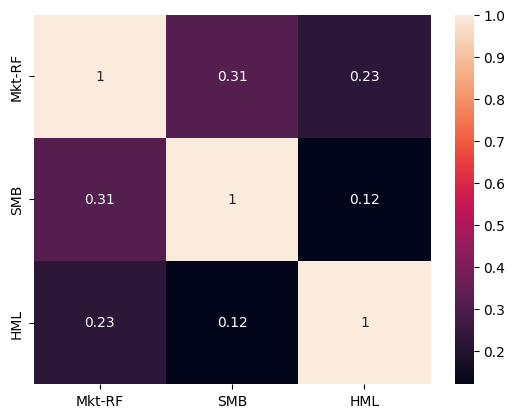

In [86]:
import seaborn as sns
display(data_less_rf.corr())
sns.heatmap(data_less_rf.corr(),annot=True)



Beginning to 1980


,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.366298,0.437848
SMB,0.366298,1.000000,0.309133
HML,0.437848,0.309133,1.000000


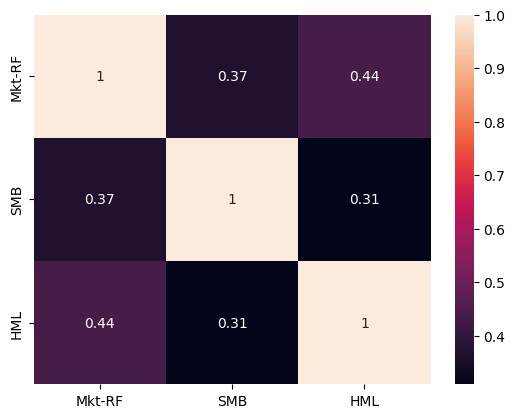

1981 to 2001


,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.164264,-0.527221
SMB,0.164264,1.000000,-0.453656
HML,-0.527221,-0.453656,1.000000


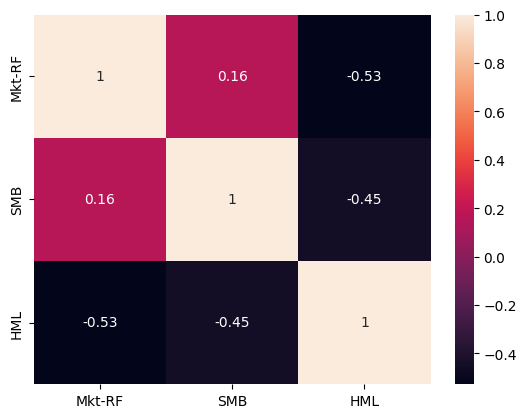

2002 to end


,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.306309,0.127782
SMB,0.306309,1.000000,0.128111
HML,0.127782,0.128111,1.000000


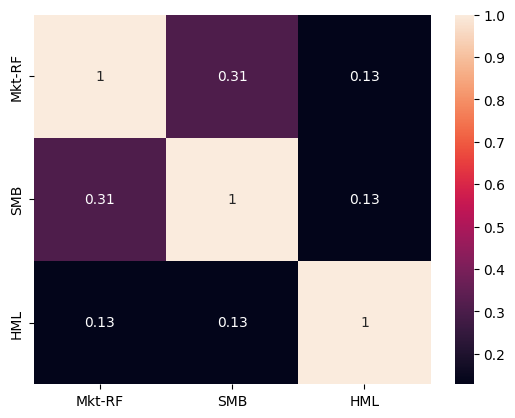

In [87]:
# Within each subsample
corr_dict = {key:value.corr() for key, value in df_dicts.items()}
for key, value in corr_dict.items():
    print(key)
    display(value)
    sns.heatmap(value,annot=True)
    plt.show()

Overall Period
Mkt-RF and SMB: Moderate positive correlation (0.314710)
Mkt-RF and HML: Moderate positive correlation (0.226890)
SMB and HML: Low positive correlation (0.120774)
Beginning to 1980
Mkt-RF and SMB: Moderate positive correlation (0.366298)
Mkt-RF and HML: Moderate to high positive correlation (0.437848)
SMB and HML: Moderate positive correlation (0.309133)
1981-2001
Mkt-RF and SMB: Low positive correlation (0.164264)
Mkt-RF and HML: Moderate negative correlation (-0.527221)
SMB and HML: Moderate negative correlation (-0.453656)
2002 to End
Mkt-RF and SMB: Moderate positive correlation (0.306309)
Mkt-RF and HML: Low positive correlation (0.127782)
SMB and HML: Low positive correlation (0.128111)

Yes, generally low correlation across all periods, including within subsamples.

## Question 2.4: Cumulative Returns

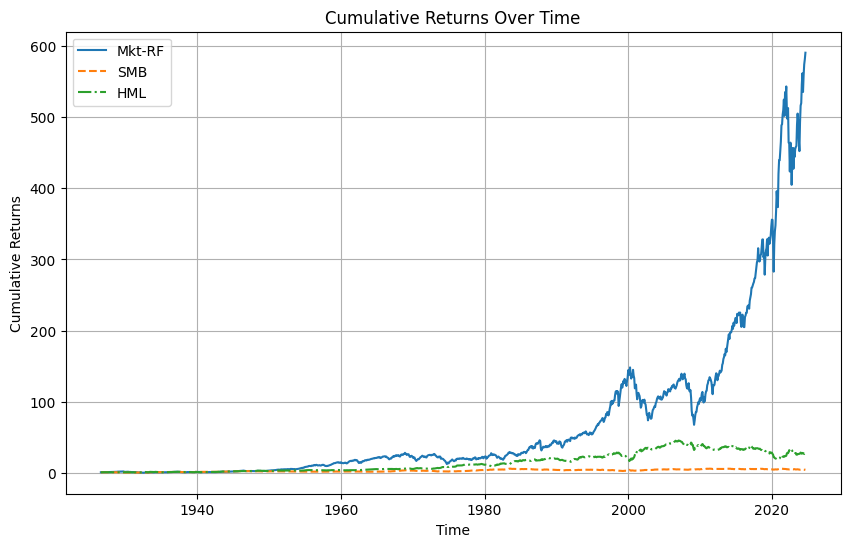

In [88]:
cumulative_returns_df = (data_less_rf + 1).cumprod()
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(cumulative_returns_df.index, cumulative_returns_df['Mkt-RF'], label='Mkt-RF', linestyle='-')
plt.plot(cumulative_returns_df.index, cumulative_returns_df['SMB'], label='SMB', linestyle='--')
plt.plot(cumulative_returns_df.index, cumulative_returns_df['HML'], label='HML', linestyle='-.')
plt.title('Cumulative Returns Over Time')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Cumulative Returns')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot

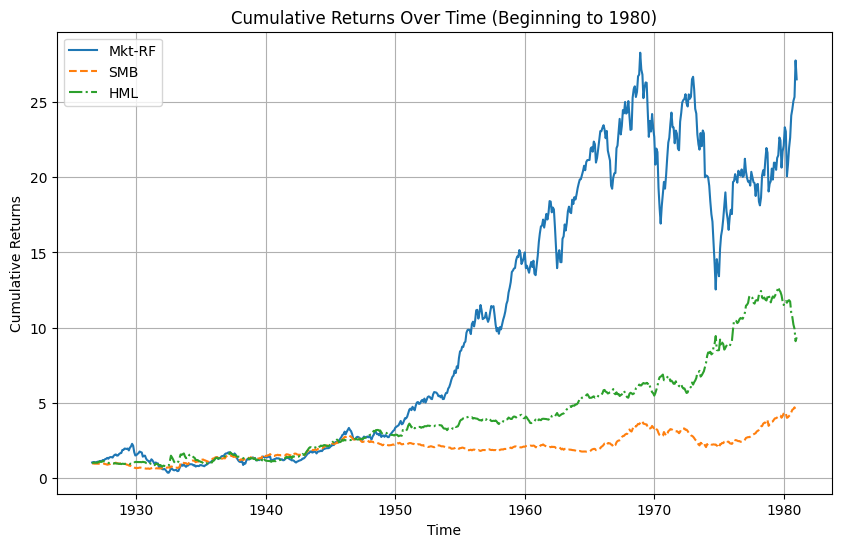

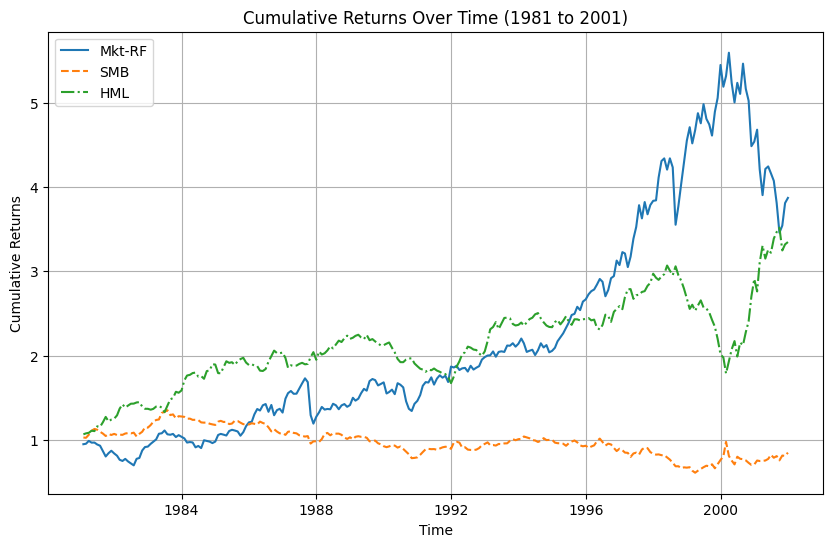

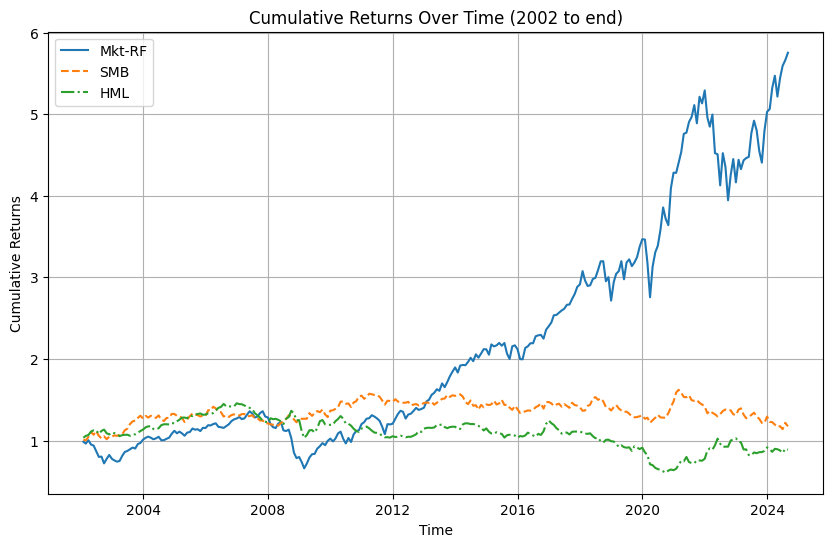

In [89]:
for period, df in df_dicts.items():
    # Calculate the cumulative returns
    cumulative_returns_df = (df + 1).cumprod()
    
    # Plotting
    plt.figure(figsize=(10, 6))  # Set the figure size for each plot
    plt.plot(cumulative_returns_df.index, cumulative_returns_df['Mkt-RF'], label='Mkt-RF', linestyle='-')
    plt.plot(cumulative_returns_df.index, cumulative_returns_df['SMB'], label='SMB', linestyle='--')
    plt.plot(cumulative_returns_df.index, cumulative_returns_df['HML'], label='HML', linestyle='-.')
    plt.title(f'Cumulative Returns Over Time ({period})')  # Title of the plot with the period
    plt.xlabel('Time')  # X-axis label
    plt.ylabel('Cumulative Returns')  # Y-axis label
    plt.legend()  # Show legend
    plt.grid(True)  # Show grid
    plt.show()  # Display the plot

## Question 2.5

It appears that the Market factor and the HML factor performed well in 1981 to 2001. However, post 2001, both the HML and SMB factor performed significantly poorly in terms of cumulative returns compared to the market factor.

In terms of portfolio strategies, there might be value to comtinue including the SMB and HL factors due to their low correlations with the market factor, potentially providing a source of diversification to the portfolio. However, market dynamics affects the performance of SMB and HML. Looking at 1981 to 2001, HML performed almost equally well with market due to the recovery period. The strong performance indicates that value stocks likely outperformed growth stocks, which can occur during periods of economic recovery or when previously undervalued market segments become favorable. Post 2001, we see a shift in market dynamics again where Value stocks (HML) may not have been favored, possibly due to an increase in technology and growth-driven sectors which typically boast lower book-to-market ratios. Small-cap stocks (SMB) may have faced challenges possibly due to market conditions that favored larger, more established companies, which can often dominate during technology booms and global expansions where scale can be an advantage.



Given the underperformance of the HML and SMB factors post-2001, it may be wise for DFA to reevaluate the weighting or the criteria for these factors in their investment strategies. This doesn’t mean eliminating these factors but perhaps recalibrating the approach to how heavily they are relied upon. Consider Dynamic weighting depending on economic factors, evolving market structures, sectoral cosniderations, enhanced factor models.

# Question 3: CAPM

## Question 3.1: Summary statistics

In [90]:
portfolios_data = load_data(filename="dfa_analysis_data.xlsx",
                 path="data",
                 sheet_name="portfolios (total returns)")
portfolios_data.set_index("Date",inplace=True)
print(portfolios_data.dtypes)
display(portfolios_data.head())



SMALL LoBM    float64
ME1 BM2       float64
ME1 BM3       float64
ME1 BM4       float64
SMALL HiBM    float64
ME2 BM1       float64
ME2 BM2       float64
ME2 BM3       float64
ME2 BM4       float64
ME2 BM5       float64
ME3 BM1       float64
ME3 BM2       float64
ME3 BM3       float64
ME3 BM4       float64
ME3 BM5       float64
ME4 BM1       float64
ME4 BM2       float64
ME4 BM3       float64
ME4 BM4       float64
ME4 BM5       float64
BIG LoBM      float64
ME5 BM2       float64
ME5 BM3       float64
ME5 BM4       float64
BIG HiBM      float64
dtype: object


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058248,-0.017006,0.004875,-0.014580,0.020534,0.012077,0.024192,0.004926,-0.026049,-0.003344,...,0.015893,0.015278,0.012978,0.002727,0.024678,0.034539,0.060902,0.020266,0.031111,0.005623
1926-08-31,-0.020206,-0.080282,0.013796,0.014606,0.083968,0.023618,-0.011849,0.040084,0.005038,0.061675,...,0.013336,0.038730,0.020021,0.021706,0.053422,0.010124,0.041903,0.020131,0.054849,0.077576
1926-09-30,-0.048291,-0.026154,-0.043417,-0.032729,0.008649,-0.026540,-0.012618,0.010829,-0.035480,-0.009401,...,0.010923,-0.005250,-0.017636,0.014646,0.008730,-0.012906,0.036538,0.000950,-0.007487,-0.024284
1926-10-31,-0.093729,-0.035519,-0.034948,0.034413,-0.025476,-0.028069,-0.032663,-0.050745,-0.080191,-0.013213,...,-0.033361,-0.026559,-0.021070,-0.031051,-0.053525,-0.027413,-0.030071,-0.022437,-0.046719,-0.058129
1926-11-30,0.055888,0.041877,0.024623,-0.044494,0.005362,0.031033,-0.023690,0.030078,0.051546,0.027292,...,0.034448,0.023887,0.037335,0.049320,0.018213,0.042946,0.025326,0.015204,0.036619,0.025636


In [91]:
rf_return = data["RF"]
portfolios_data_in_excess = portfolios_data.sub(rf_return,axis=0).loc[pd.to_datetime('1981-01-31'):]
display(portfolios_data_in_excess.head())


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.054941,-0.014888,0.009909,0.005911,0.021085,-0.059733,-0.010738,-0.012684,0.007626,0.020623,...,-0.077022,-0.044926,-0.012942,-0.005534,0.003924,-0.071746,-0.083592,-0.074265,-0.010037,0.009464
1981-02-28,-0.044745,-0.010535,0.001444,0.009240,0.014398,-0.014473,0.005102,0.017420,0.024361,0.027939,...,0.002600,0.014707,0.034695,0.002673,0.027240,0.021950,0.009415,-0.016450,0.020446,-0.016853
1981-03-31,0.060718,0.082395,0.073568,0.077655,0.061040,0.068082,0.071500,0.066319,0.066325,0.063175,...,0.080443,0.055672,0.073222,0.061934,0.064868,0.017353,0.019940,-0.008875,0.022230,0.069573
1981-04-30,0.018141,0.035914,0.024600,0.036523,0.044090,0.006012,0.024744,0.026586,0.026781,0.029442,...,-0.010849,-0.019081,-0.006016,-0.007801,0.006253,-0.038311,-0.053508,-0.038006,0.010439,-0.040374
1981-05-31,0.038153,0.037824,0.032399,0.013389,0.016837,0.050452,0.010304,0.016889,-0.008609,0.013558,...,0.023970,0.010245,0.007640,-0.000759,0.021978,0.004288,-0.032791,-0.031355,0.026669,-0.005979


In [92]:
portfolio_stats = calculate_stats(portfolios_data_in_excess)
display(portfolio_stats)

,Annualised_Mean,Annualised_Vol,Annualised_Sharpe,Annualised_VaR
SMALL LoBM,0.006671,0.273771,0.024366,-0.436683
ME1 BM2,0.088689,0.236403,0.375163,-0.328213
ME1 BM3,0.092006,0.201252,0.457170,-0.298698
ME1 BM4,0.115998,0.194270,0.597099,-0.266640
SMALL HiBM,0.127838,0.210037,0.608646,-0.306695
ME2 BM1,0.058868,0.245156,0.240125,-0.360600
ME2 BM2,0.100515,0.205528,0.489059,-0.296737
ME2 BM3,0.105946,0.185777,0.570288,-0.271896
ME2 BM4,0.108835,0.182098,0.597670,-0.263750
ME2 BM5,0.115994,0.215616,0.537967,-0.333932


In [93]:
## Can the difference in mean excess returns of the portfolios be explained by 
## differences in  their volatilities or VaR?

from sklearn.linear_model import LinearRegression
mean_excess_returns = portfolio_stats["Annualised_Mean"]
port_vols = portfolio_stats["Annualised_Vol"]
port_var = portfolio_stats["Annualised_VaR"]

model_vol = LinearRegression(fit_intercept=True)
model_vol.fit(port_vols.values.reshape(-1,1),mean_excess_returns)

model_var = LinearRegression(fit_intercept=True)
model_var.fit(port_var.values.reshape(-1,1),mean_excess_returns)

vol_r2 = model_vol.score(port_vols.values.reshape(-1,1),mean_excess_returns)
var_r2 = model_var.score(port_var.values.reshape(-1,1),mean_excess_returns)

print(f"R^2 for Volatility: {vol_r2}")
print(f"R^2 for VaR: {var_r2}")


R^2 for Volatility: 0.20355886801177103
R^2 for VaR: 0.3252243107023912


Looking at the regression coefficient of excess market returns to volatility and VaR, the variance explained by annualised volatility and variance explained by VaR individually is low. Volatility (0.2035) and VaR (0.325) suggest that neither annualized volatility nor VaR (.05) statistics alone effectively explain the differences in mean excess returns across different portfolios. This indicates that the variability in returns is not primarily driven by differences in either the overall risk levels (as measured by volatility) or the tail risks (as measured by VaR).

## Question 3.2: CAPM

In [94]:
spy = data["Mkt-RF"].loc[pd.to_datetime('1981-01-31'):]
portfolios_data_in_excess.columns

Index(['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1',
       'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2',
       'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3',
       'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3', 'ME5 BM4',
       'BIG HiBM'],
      dtype='object')

In [95]:
from dask.distributed import Client
futures = []
with Client() as client:
    model = LinearRegression(fit_intercept=True)
    for col in portfolios_data_in_excess.columns:   
        futures.append(client.submit(model.fit,spy.values.reshape(-1,1), portfolios_data_in_excess[col].values))
    results = {col_name: future.result() for col_name, future in zip(portfolios_data_in_excess.columns,futures)}
results
    


{'SMALL LoBM': LinearRegression(),
 'ME1 BM2': LinearRegression(),
 'ME1 BM3': LinearRegression(),
 'ME1 BM4': LinearRegression(),
 'SMALL HiBM': LinearRegression(),
 'ME2 BM1': LinearRegression(),
 'ME2 BM2': LinearRegression(),
 'ME2 BM3': LinearRegression(),
 'ME2 BM4': LinearRegression(),
 'ME2 BM5': LinearRegression(),
 'ME3 BM1': LinearRegression(),
 'ME3 BM2': LinearRegression(),
 'ME3 BM3': LinearRegression(),
 'ME3 BM4': LinearRegression(),
 'ME3 BM5': LinearRegression(),
 'ME4 BM1': LinearRegression(),
 'ME4 BM2': LinearRegression(),
 'ME4 BM3': LinearRegression(),
 'ME4 BM4': LinearRegression(),
 'ME4 BM5': LinearRegression(),
 'BIG LoBM': LinearRegression(),
 'ME5 BM2': LinearRegression(),
 'ME5 BM3': LinearRegression(),
 'ME5 BM4': LinearRegression(),
 'BIG HiBM': LinearRegression()}

In [96]:
annual_factor = 12
model_results = {col_name: {"beta": model.coef_[0], 'alpha': model.intercept_, 
                            "Annualised_alpha": model.intercept_ * annual_factor,
                            "Annualised_Residuals_vol": (portfolios_data_in_excess[col_name] - model.predict(spy.values.reshape(-1,1))).std() *np.sqrt(annual_factor),
                            "Annualised_Treynor_Ratio": portfolios_data_in_excess[col_name].mean() * annual_factor/model.coef_[0],
                            "Annualised_Information_Ratio":model.intercept_ *np.sqrt(annual_factor)/(portfolios_data_in_excess[col_name] - model.predict(spy.values.reshape(-1,1))).std()} for col_name, model in results.items()}

In [97]:
model_results_df = pd.DataFrame(model_results).T
display(model_results_df)

,beta,alpha,Annualised_alpha,Annualised_Residuals_vol,Annualised_Treynor_Ratio,Annualised_Information_Ratio
SMALL LoBM,1.356365,-0.008894,-0.106730,0.173994,0.004918,-0.613409
ME1 BM2,1.165744,-0.000731,-0.008774,0.151278,0.076080,-0.057999
ME1 BM3,1.045218,0.000385,0.004620,0.118204,0.088026,0.039081
ME1 BM4,0.972450,0.002891,0.034696,0.121558,0.119285,0.285425
SMALL HiBM,0.994979,0.003721,0.044652,0.141685,0.128483,0.315148
ME2 BM1,1.338627,-0.004421,-0.053049,0.128787,0.043976,-0.411917
ME2 BM2,1.134902,0.000469,0.005631,0.104708,0.088568,0.053775
ME2 BM3,1.028607,0.001662,0.019949,0.093913,0.103000,0.212415
ME2 BM4,0.974696,0.002279,0.027344,0.100444,0.111660,0.272232
ME2 BM5,1.114415,0.001902,0.022822,0.127793,0.104085,0.178588


In [98]:
# Report the mean absoulte error of the CAPM
mae_CAPM = model_results_df["Annualised_alpha"].abs().mean()
print(f"Mean Absolute Error of CAPM: {mae_CAPM}")

Mean Absolute Error of CAPM: 0.02242802690077374


If CAPM was true, we should have expected that the MAE is 0.

Ratios of beta, treynor ratio, information ratio for each regression shown in the dataframe above.

If the CAPM is true, Treynor ratios ahould all be the same and equivalent to market risk premium. The alphas should be each asset and the Information ratio should also be 0. We would expect the intercept to be low and close to zero as the beta, or the slope of the regression should acccount for most of the change in the scenario. We would expect the Beta to be high as it is explaining most of the change in relation to the market. As a result, the R^2 would also be expected to be very close to 1 as it is a measure in how much of a variation in a portfolio's return is explained by the variation in the market's return, and it all should be explained by the variation in the market's return. Unrelated to the CAPM, the data does suggest the belief of DFA holds. The regression shows us that there is a significant amount not being explained through the 25 factors. Therfore, there are other regressors that need to be added and there is a risk premia through value and growth stocks, as they would help capture more of the variation in the market.

## Question 3.3: Cross Sectional Estimation

R^2 of the cross-sectional model: 0.3005567883855058
Regression Slope: -0.009015397451430271
Regression Intercept: 0.017385218939714203
SPY mean excess return: 0.006967175572519084


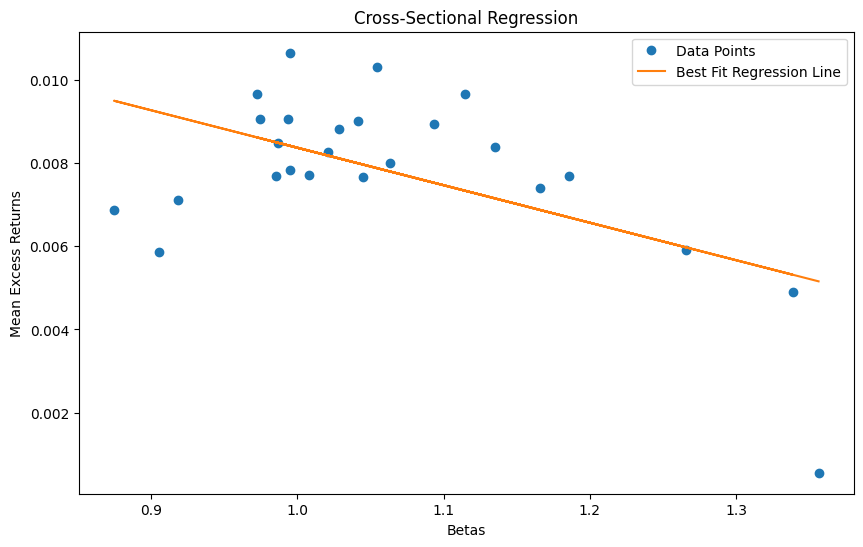

In [99]:
mean_excess_returns = portfolios_data_in_excess.mean()
betas = model_results_df["beta"]
cross_sectional_model = LinearRegression(fit_intercept=True)
cross_sectional_model.fit(betas.values.reshape(-1,1),mean_excess_returns)
regression_intercept = cross_sectional_model.intercept_
regression_slope = cross_sectional_model.coef_[0]
regression_residuals = mean_excess_returns - cross_sectional_model.predict(betas.values.reshape(-1,1))
r_squared = cross_sectional_model.score(betas.values.reshape(-1,1),mean_excess_returns)
print(f"R^2 of the cross-sectional model: {r_squared}")
print(f"Regression Slope: {regression_slope}")
print(f"Regression Intercept: {regression_intercept}")
print(f"SPY mean excess return: {spy.mean()}")
plt.figure(figsize=(10,6))
plt.plot(betas,mean_excess_returns,"o")
plt.plot(betas,cross_sectional_model.predict(betas.values.reshape(-1,1)))
plt.xlabel("Betas")
plt.ylabel("Mean Excess Returns")
plt.title("Cross-Sectional Regression")
plt.legend(["Data Points","Best Fit Regression Line"])
plt.show()

The r squared should be 1 if CAPM was true, meaning the only factor that affects the excess returns of an asset is the market risk. The intercept should be 0, signifying no unexplained component that drives the expected returns of an asset. Lastly, the regression coefficient should be equal to the market risk premium/market excess return assuming SPY is the tangency portfolio. Looking at the data, this is not the case and the CAPM does not hold in this scenario.
We would also expect the information ratio to be zero because the mean return should equal the benchmark return in this scenario resulting in 0, but that is also not the case in this sample, so the CAPM does not hold here either.

## Question 3.4: Does this support DFA's belief in size and value portfolio containing premia

Broadly speaking, the results show that size and value portfolio do not follow CAPM model well. This therefore signifies that there must be other factors that affect the excess returns of these portfolios apart from the level of market risk taken. As such, this supports DFA's belief that size and value portfolios contain premia that are unrelated to the CAPM.

# Question 4: Extensions

Tangency Weights:


array([-2.12252699,  0.71475289,  0.1741334 ,  1.14901914,  0.94803628,
       -0.38637585,  0.90610972,  0.17669527, -0.21485391, -0.81331389,
       -0.60472449,  0.16870091, -0.55375447,  0.28411106,  0.19429517,
        1.24114647, -0.37360658, -0.56120343,  0.09005802,  0.17034568,
        1.02008194, -0.13998204,  0.07367604, -0.83835855,  0.29753821])

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,0.116614,-0.010641,0.001725,0.006792,0.019989,0.023079,-0.009730,-0.002241,-0.001638,-0.016773,...,-0.095596,0.016785,0.007263,-0.000498,0.000668,-0.073187,0.011701,-0.005472,0.008415,0.002816
1981-02-28,0.094972,-0.007530,0.000251,0.010617,0.013650,0.005592,0.004623,0.003078,-0.005234,-0.022723,...,0.003227,-0.005495,-0.019471,0.000241,0.004640,0.022391,-0.001318,-0.001212,-0.017141,-0.005014
1981-03-31,-0.128876,0.058892,0.012811,0.089227,0.057868,-0.026305,0.064787,0.011718,-0.014250,-0.051381,...,0.099842,-0.020799,-0.041092,0.005578,0.011050,0.017701,-0.002791,-0.000654,-0.018637,0.020701
1981-04-30,-0.038505,0.025670,0.004284,0.041966,0.041799,-0.002323,0.022421,0.004698,-0.005754,-0.023946,...,-0.013465,0.007129,0.003376,-0.000703,0.001065,-0.039080,0.007490,-0.002800,-0.008752,-0.012013
1981-05-31,-0.080981,0.027035,0.005642,0.015384,0.015962,-0.019493,0.009337,0.002984,0.001850,-0.011027,...,0.029750,-0.003828,-0.004288,-0.000068,0.003744,0.004374,0.004590,-0.002310,-0.022358,-0.001779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,0.276200,-0.054722,-0.013897,-0.090915,-0.076002,0.028199,-0.079230,-0.012035,0.013065,0.059673,...,-0.076813,0.025765,0.036323,-0.006598,-0.010568,-0.045594,-0.001009,-0.003641,0.045806,-0.017687
2024-05-31,-0.144181,0.020100,0.007820,0.035810,0.041231,-0.016064,0.025251,0.008951,-0.009459,-0.037671,...,0.026379,-0.006497,-0.010936,0.004370,0.005394,0.056525,-0.005262,0.001925,-0.030251,0.011384
2024-06-30,0.099948,-0.019514,-0.010458,-0.023565,-0.028145,0.009003,-0.022554,-0.004367,0.004182,0.026767,...,-0.012624,0.008114,0.015126,-0.001865,-0.005391,0.058218,-0.000976,-0.000064,0.017431,0.000596


,MV Portfolio
Date,
1981-01-31,0.044056
1981-02-28,0.055052
1981-03-31,0.113298
1981-04-30,0.013588
1981-05-31,-0.028835
...,...
2024-04-30,0.025892
2024-05-31,-0.031765
2024-06-30,0.092400


,beta,alpha,Annualised_alpha,Annualised_Residuals_vol,Annualised_Treynor_Ratio,Annualised_Information_Ratio
SMALL LoBM,0.017416,-1.544988e-16,-1.853986e-15,0.273747,0.383026,-6.772633e-15
ME1 BM2,0.231549,-1.379105e-16,-1.654926e-15,0.231470,0.383026,-7.149645e-15
ME1 BM3,0.240209,-8.673617e-17,-1.040834e-15,0.194983,0.383026,-5.338075e-15
ME1 BM4,0.302847,-9.367507e-17,-1.124101e-15,0.183828,0.383026,-6.114962e-15
SMALL HiBM,0.333758,-5.377643e-17,-6.453171e-16,0.198293,0.383026,-3.254354e-15
ME2 BM1,0.153692,-1.509209e-16,-1.811051e-15,0.243073,0.383026,-7.450647e-15
ME2 BM2,0.262425,-8.153200e-17,-9.783840e-16,0.198185,0.383026,-4.936711e-15
ME2 BM3,0.276604,-9.194034e-17,-1.103284e-15,0.176691,0.383026,-6.244154e-15
ME2 BM4,0.284144,-6.245005e-17,-7.494005e-16,0.172291,0.383026,-4.349612e-15
ME2 BM5,0.302836,-9.887924e-17,-1.186551e-15,0.206258,0.383026,-5.752756e-15


Mean Absolute Error of CAPM: 8.939203544056084e-16
R^2 of the cross-sectional model: 1.0
Regression Slope: 0.03191882829346909
Regression Intercept: -1.3530843112619095e-16
Tangency mean excess return: MV Portfolio    0.031919
dtype: float64


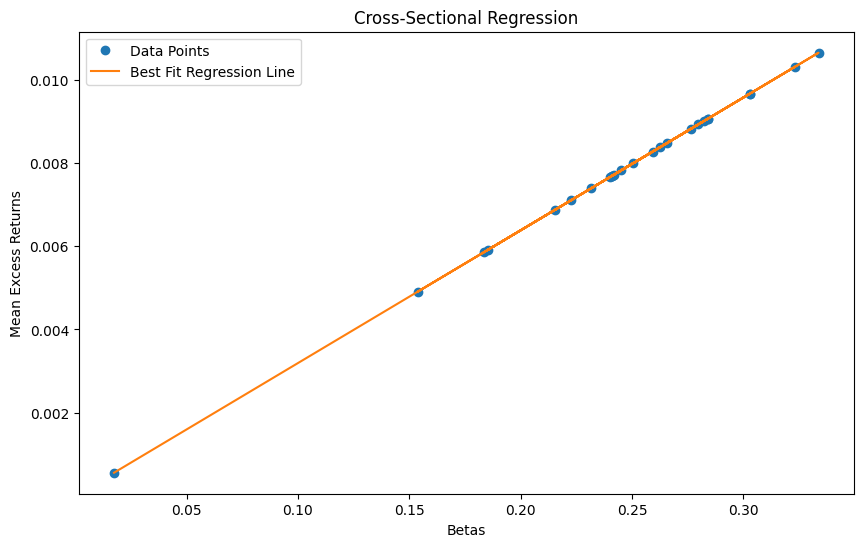

In [100]:
mv_data = portfolios_data_in_excess.copy()
tangency_weights = (np.linalg.inv(mv_data.cov()) @ mv_data.mean()) / (np.linalg.inv(mv_data.cov()) @ mv_data.mean() @np.ones(mv_data.shape[1]))
print("Tangency Weights:")
tangency_weights_df = pd.DataFrame(tangency_weights, index=mv_data.columns, columns=["Tangency_Weights"])
display(tangency_weights)
mv_data_weighted = pd.DataFrame({col: (mv_data[col] * weight) for col,weight in zip(mv_data.columns, tangency_weights)})
display(mv_data_weighted)

mv_portfolio_excess_returns = (mv_data @ tangency_weights).to_frame(name = "MV Portfolio")
display(mv_portfolio_excess_returns)

X = mv_portfolio_excess_returns
y_df = portfolios_data_in_excess
futures = [] 
with Client() as client:
    model = LinearRegression(fit_intercept=True)
    for col in y_df.columns:
        futures.append(client.submit(model.fit,X.values.reshape(-1,1),y_df[col].values))
    results = {col_name: future.result() for col_name, future in zip(y_df.columns,futures)}

annual_factor = 12
model_results = {col_name: {"beta": model.coef_[0], 'alpha': model.intercept_, 
                            "Annualised_alpha": model.intercept_ * annual_factor,
                            "Annualised_Residuals_vol": (y_df[col_name] - model.predict(X.values.reshape(-1,1))).std() *np.sqrt(annual_factor),
                            "Annualised_Treynor_Ratio": y_df[col_name].mean() * annual_factor/model.coef_[0],
                            "Annualised_Information_Ratio":model.intercept_ *np.sqrt(annual_factor)/(y_df[col_name] - model.predict(X.values.reshape(-1,1))).std()} for col_name, model in results.items()}
model_results_df = pd.DataFrame(model_results).T
display(model_results_df)
# Report the mean absoulte error of the CAPM
mae_CAPM = model_results_df["Annualised_alpha"].abs().mean()
print(f"Mean Absolute Error of CAPM: {mae_CAPM}")
mean_excess_returns = portfolios_data_in_excess.mean()
betas = model_results_df["beta"]
cross_sectional_model = LinearRegression(fit_intercept=True)
cross_sectional_model.fit(betas.values.reshape(-1,1),mean_excess_returns)
regression_intercept = cross_sectional_model.intercept_
regression_slope = cross_sectional_model.coef_[0]
regression_residuals = mean_excess_returns - cross_sectional_model.predict(betas.values.reshape(-1,1))
r_squared = cross_sectional_model.score(betas.values.reshape(-1,1),mean_excess_returns)
print(f"R^2 of the cross-sectional model: {r_squared}")
print(f"Regression Slope: {regression_slope}")
print(f"Regression Intercept: {regression_intercept}")
print(f"Tangency mean excess return: {mv_portfolio_excess_returns.mean()}")
plt.figure(figsize=(10,6))
plt.plot(betas,mean_excess_returns,"o")
plt.plot(betas,cross_sectional_model.predict(betas.values.reshape(-1,1)))
plt.xlabel("Betas")
plt.ylabel("Mean Excess Returns")
plt.title("Cross-Sectional Regression")
plt.legend(["Data Points","Best Fit Regression Line"])
plt.show()


Testing the MV model, The alphas are close to 0, cross-sectional regression coefficient is 1. Intercept of cross sectional regression is 0, the MV model perfectly explains the returns of the various assets.

## Question 4.2

In [101]:
# Farma French 3-Factor model

X = data_less_rf.copy().loc[pd.to_datetime('1981-01-31'):]
y_df = portfolios_data_in_excess
futures = [] 
with Client() as client:
    model = LinearRegression(fit_intercept=True)
    for col in y_df.columns:
        futures.append(client.submit(model.fit,X.values.reshape(-1,X.shape[1]),y_df[col].values))
    results = {col_name: future.result() for col_name, future in zip(y_df.columns,futures)}




In [102]:
FF_model_results = {col_name: {"betas": model.coef_,
            "alpha":model.intercept_}for col_name, model in results.items()}
FF_model_results

{'SMALL LoBM': {'betas': array([ 1.11184565,  1.39251726, -0.25378839]),
  'alpha': -0.007150901876181789},
 'ME1 BM2': {'betas': array([ 0.96545632,  1.31767511, -0.01443202]),
  'alpha': 0.00011961815698518629},
 'ME1 BM3': {'betas': array([0.92314154, 1.065113  , 0.27744468]),
  'alpha': 4.954812023206037e-05},
 'ME1 BM4': {'betas': array([0.87781831, 1.06575267, 0.47739871]),
  'alpha': 0.0018486687076389192},
 'SMALL HiBM': {'betas': array([0.92978742, 1.06600625, 0.69141743]),
  'alpha': 0.0019211136918569904},
 'ME2 BM1': {'betas': array([ 1.14189717,  1.02328141, -0.31025033]),
  'alpha': -0.002701826724512001},
 'ME2 BM2': {'betas': array([1.01377809, 0.9158582 , 0.12128712]),
  'alpha': 0.0005958508156837005},
 'ME2 BM3': {'betas': array([0.97397677, 0.71924411, 0.38922364]),
  'alpha': 0.000721493865225813},
 'ME2 BM4': {'betas': array([0.94128767, 0.74833165, 0.57507989]),
  'alpha': 0.0006977320013461016},
 'ME2 BM5': {'betas': array([1.08919359, 0.92977944, 0.83276753]),


In [103]:
beta_df = pd.DataFrame({col: FF_model_results[col]["betas"] for col in FF_model_results},index = X.columns).T
alpha_df = pd.DataFrame({col: FF_model_results[col]["alpha"] for col in FF_model_results},index = ["alpha"]).T
display(beta_df)
display(alpha_df)

,Mkt-RF,SMB,HML
SMALL LoBM,1.111846,1.392517,-0.253788
ME1 BM2,0.965456,1.317675,-0.014432
ME1 BM3,0.923142,1.065113,0.277445
ME1 BM4,0.877818,1.065753,0.477399
SMALL HiBM,0.929787,1.066006,0.691417
ME2 BM1,1.141897,1.023281,-0.310250
ME2 BM2,1.013778,0.915858,0.121287
ME2 BM3,0.973977,0.719244,0.389224
ME2 BM4,0.941288,0.748332,0.575080
ME2 BM5,1.089194,0.929779,0.832768


,alpha
SMALL LoBM,-0.007151
ME1 BM2,0.000120
ME1 BM3,0.000050
ME1 BM4,0.001849
SMALL HiBM,0.001921
ME2 BM1,-0.002702
ME2 BM2,0.000596
ME2 BM3,0.000721
ME2 BM4,0.000698
ME2 BM5,-0.000481


In [104]:
mae_alphas = alpha_df["alpha"].abs().mean()
residuals_df = pd.DataFrame({col: y_df[col] - model.predict(X.values.reshape(-1,X.shape[1])) for col, model in results.items()})
treynor_ratios = y_df.mean() * annual_factor / beta_df["Mkt-RF"]
information_ratios = alpha_df["alpha"] / residuals_df.std() * np.sqrt(annual_factor)
print(f"Mean Absolute Error of Alphas: {mae_alphas}")
print("Treynor Ratios")
display(treynor_ratios)
print("Information Ratios")
display(information_ratios)


Mean Absolute Error of Alphas: 0.0012041875119172434
Treynor Ratios


SMALL LoBM    0.006000
ME1 BM2       0.091863
ME1 BM3       0.099666
ME1 BM4       0.132144
SMALL HiBM    0.137492
ME2 BM1       0.051553
ME2 BM2       0.099149
ME2 BM3       0.108777
ME2 BM4       0.115623
ME2 BM5       0.106495
ME3 BM1       0.064498
ME3 BM2       0.104347
ME3 BM3       0.093998
ME3 BM4       0.107217
ME3 BM5       0.113380
ME4 BM1       0.086337
ME4 BM2       0.090607
ME4 BM3       0.088937
ME4 BM4       0.098661
ME4 BM5       0.096849
BIG LoBM      0.095270
ME5 BM2       0.088765
ME5 BM3       0.087093
ME5 BM4       0.068076
BIG HiBM      0.085044
dtype: float64

Information Ratios


SMALL LoBM   -0.937530
ME1 BM2       0.020344
ME1 BM3       0.011988
ME1 BM4       0.467283
SMALL HiBM    0.312014
ME2 BM1      -0.539477
ME2 BM2       0.141210
ME2 BM3       0.165561
ME2 BM4       0.186100
ME2 BM5      -0.124297
ME3 BM1      -0.252699
ME3 BM2       0.241669
ME3 BM3      -0.089792
ME3 BM4       0.035079
ME3 BM5       0.045657
ME4 BM1       0.210333
ME4 BM2      -0.004764
ME4 BM3      -0.140565
ME4 BM4      -0.045125
ME4 BM5      -0.176029
BIG LoBM      0.677503
ME5 BM2       0.069674
ME5 BM3      -0.093350
ME5 BM4      -0.650375
BIG HiBM     -0.269126
dtype: float64

,beta,alpha,Annualised_alpha,Annualised_Residuals_vol,Annualised_Treynor_Ratio,Annualised_Information_Ratio
SMALL LoBM,1.336095,-0.010361,-0.124335,0.141578,0.004993,-0.878205
ME1 BM2,1.185250,-0.002294,-0.027525,0.112597,0.074828,-0.244459
ME1 BM3,1.069319,-0.001070,-0.012842,0.073029,0.086042,-0.175842
ME1 BM4,1.025803,0.001285,0.015417,0.073321,0.113081,0.210270
SMALL HiBM,1.063259,0.001965,0.023584,0.096665,0.120232,0.243981
ME2 BM1,1.257458,-0.005369,-0.064427,0.107090,0.046815,-0.601614
ME2 BM2,1.107096,-0.000670,-0.008036,0.067411,0.090792,-0.119214
ME2 BM3,1.009932,0.000577,0.006922,0.056054,0.104904,0.123480
ME2 BM4,0.985525,0.001017,0.012203,0.057330,0.110433,0.212854
ME2 BM5,1.153814,0.000238,0.002862,0.074456,0.100531,0.038433


Mean Absolute Error of FF: 0.01940719175535917
R^2 of the cross-sectional model: 0.08526668397996917
Regression Slope: -0.0038759899293285484
Regression Intercept: 0.01169789878429038


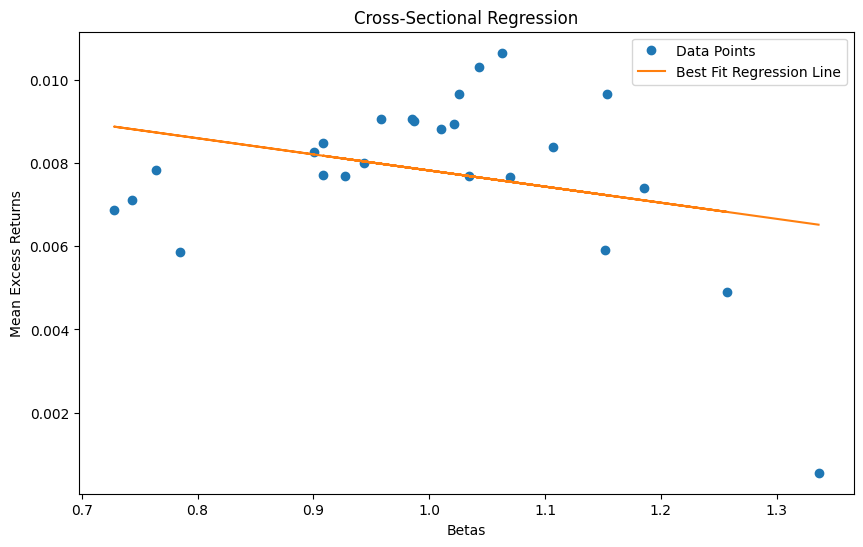

In [105]:
# Cross sectional regression

Combined_factors  = (X @ beta_df.T)
X_combined = Combined_factors.mean(axis=1)  

y_df = portfolios_data_in_excess
futures = [] 
with Client() as client:
    model = LinearRegression(fit_intercept=True)
    for col in y_df.columns:
        futures.append(client.submit(model.fit,X_combined.values.reshape(-1,1),y_df[col].values))
    results = {col_name: future.result() for col_name, future in zip(y_df.columns,futures)}

annual_factor = 12
model_results = {col_name: {"beta": model.coef_[0], 'alpha': model.intercept_, 
                            "Annualised_alpha": model.intercept_ * annual_factor,
                            "Annualised_Residuals_vol": (y_df[col_name] - model.predict(X_combined.values.reshape(-1,1))).std() *np.sqrt(annual_factor),
                            "Annualised_Treynor_Ratio": y_df[col_name].mean() * annual_factor/model.coef_[0],
                            "Annualised_Information_Ratio":model.intercept_ *np.sqrt(annual_factor)/(y_df[col_name] - model.predict(X_combined.values.reshape(-1,1))).std()} for col_name, model in results.items()}
model_results_df = pd.DataFrame(model_results).T
display(model_results_df)
# Report the mean absoulte error of the Farma French 3-Factor model
mae = model_results_df["Annualised_alpha"].abs().mean()
print(f"Mean Absolute Error of FF: {mae}")
mean_excess_returns = portfolios_data_in_excess.mean()
betas = model_results_df["beta"]
cross_sectional_model = LinearRegression(fit_intercept=True)
cross_sectional_model.fit(betas.values.reshape(-1,1),mean_excess_returns)
regression_intercept = cross_sectional_model.intercept_
regression_slope = cross_sectional_model.coef_[0]
regression_residuals = mean_excess_returns - cross_sectional_model.predict(betas.values.reshape(-1,1))
r_squared = cross_sectional_model.score(betas.values.reshape(-1,1),mean_excess_returns)
print(f"R^2 of the cross-sectional model: {r_squared}")
print(f"Regression Slope: {regression_slope}")
print(f"Regression Intercept: {regression_intercept}")
plt.figure(figsize=(10,6))
plt.plot(betas,mean_excess_returns,"o")
plt.plot(betas,cross_sectional_model.predict(betas.values.reshape(-1,1)))
plt.xlabel("Betas")
plt.ylabel("Mean Excess Returns")
plt.title("Cross-Sectional Regression")
plt.legend(["Data Points","Best Fit Regression Line"])
plt.show()


## Comparative Analysis of CAPM and Fama-French Model Results

### Introduction
This analysis compares the performance of the Capital Asset Pricing Model (CAPM) using the market index (SPY) and a tangency portfolio, against the Fama-French (FF) three-factor model. We assess which model better explains the returns across portfolios using regression statistics.

### Results Overview

- **CAPM with SPY as Market Factor:**
  - **Mean Absolute Error (MAE) of CAPM**: `0.02243`
  - **R^2 of the cross-sectional model**: `0.3006`
  - **Regression Slope**: `-0.00902`
  - **Regression Intercept**: `0.01739`
  - **SPY mean excess return**: `0.00697`

- **CAPM with Tangency Portfolio as Factor:**
  - **MAE of CAPM**: Approximately `0` (`8.94e-16`)
  - **R^2 of the cross-sectional model**: `1.0`
  - **Regression Slope**: `0.03192`
  - **Regression Intercept**: Approximately `0` (`-1.35e-16`)
  - **Tangency mean excess return**: `0.03192`

- **Fama-French (FF) Model Results:**
  - **Mean Absolute Error of FF**: `0.01941`
  - **R^2 of the cross-sectional model**: `0.0853`
  - **Regression Slope**: `-0.00388`
  - **Regression Intercept**: `0.01170`

### Analysis and Interpretation

- **CAPM with SPY**:
  - Using SPY as the market factor in CAPM yields a moderate R^2 of `0.3006`, suggesting that while SPY captures a significant portion of the systematic risk, it leaves a notable amount unexplained, evidenced by the positive regression intercept and the negative slope.

- **CAPM with Tangency Portfolio**:
  - The CAPM model using the tangency portfolio exhibits a perfect fit (R^2 of `1.0`) and an MAE close to zero. This indicates that the tangency portfolio, by definition, perfectly spans all the portfolios analyzed and aligns with the theoretical expectation that the market portfolio should capture all systematic risks under CAPM.

- **Fama-French Model**:
  - The FF model, incorporating size and value factors in addition to market risk, shows a significantly lower explanatory power with an R^2 of `0.0853`. The negative regression slope and a higher intercept indicate considerable deviations from the model, suggesting that the three-factor model may not capture all the relevant risk dimensions for these portfolios.

### Conclusion

- **Efficacy of Models**:
  - **CAPM with Tangency Portfolio** is the most effective model in explaining portfolio returns, indicating its robustness when the correct market portfolio is identified and used.
  - **Fama-French Model** underperforms in this comparison, indicating either model specification issues or the presence of other unidentified factors affecting portfolio returns.
  - **CAPM with SPY** provides useful but incomplete insights into asset pricing, suggesting the need for additional factors or refined models in certain contexts.

- **Implications**:
  - If CAPM holds (as seen with the tangency portfolio), R^2 should be close to `1.0`, with both the slope and intercept near zero, indicating no significant alpha or unexplained returns outside the model.
  - The performance of the FF model suggests that additional factors may be required to better capture the dynamics affecting asset returns, especially in a more diversified or complex investment environment.


## Question 4.3

a) The test on H is gstricter and more comprehensive than individual t-tests. While the t-tests on each check for significance individually without considering the interdependencies (covariance) among assets, the H statistic accounts for these relationships and tests the overall adequacy of CAPM for all assets simultaneously. Thus,  H provides a holistic view of the model's performance across the portfolio. The t-test checks if individual α values from the regressions are significantly different from zero. Each t-test evaluates whether the mean return that isn't explained by the market return is statistically significant for each asset. This involves assessing each 𝛼 individually.

b) Tangency Portfolio is the portfolio on the efficient frontier with the highest Sharpe Ratio (the best possible risk-adjusted returns). According to CAPM, the market portfolio should be the tangency portfolio, implying that all assets should be perfectly explained by their relationship with the market portfolio. The test statistic H checks whether the market portfolio alone can explain the returns of all the portfolios in question, effectively testing if market portfolio acts as tangency portfolio. If H is significantly different from 0, this implies market portfolio does not span tangency portfolio, as there are systemic patterns that market portfolio cannot explain. From markowitz portfolio theory, the tangency portfolio should be the portfolio all mean variance optimizing investor should be holding, and all other excess returns or portfolios are a combination of this tangency portfolio and the risk free rate 